## Desafio 

Uma empresa alimentícia situada no RJ deseja expandir suas operações para a cidade de São Paulo, focando em adultos de 25 a 50 anos das classes A (rendas A1 e A2) e B (rendas B1 e B2). A empresa já possui operações no Rio de Janeiro e, antes de investir, quer estimar o potencial de faturamento em cada bairro de São Paulo.

Como o mercado de São Paulo é desconhecido para a empresa, ela pretende usar as informações que já possui sobre os bairros do Rio de Janeiro para **estimar o potencial de faturamento** nos bairros de São Paulo.

O engenheiro de dados ajudou a extrair os dados de faturamento e potencial dos bairros do Rio de Janeiro fornecidos pelo cliente, juntamente com os dados sociodemográficos dos bairros do Rio de Janeiro e São Paulo.

O descritivo dos dados disponíveis e arquivo .CSV está na pasta data deste repositorio.

# Perguntas

1. Análises exploratórias e preparação dos dados.
2. Modelo para estimar o faturamento que uma loja teria em cada um dos bairros de São Paulo.
3. Validação do modelo e conclusões sobre os resultados.

### 1. Análise exploratória e preparação dos dados

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv(r'\data\dados.csv')
df

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosA2,domiciliosB1,domiciliosB2,domiciliosC1,domiciliosC2,domiciliosD,domiciliosE,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,145,715,1242,1093,758,92,304,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,0,82,506,2040,2490,827,2506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,96,404,652,644,522,77,254,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,178,393,517,945,584,137,286,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,0,1089,2821,5110,5422,1073,3261,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213,Vila Sônia,São Paulo,SP,34061,2908,1462,2253,2076,4579,...,1089,2866,2219,2216,1227,306,1098,5285,NaN,NaN
452,355030207,Vila Suzana,São Paulo,SP,35403,4127,1890,2678,2433,5855,...,1522,2458,1186,1166,918,209,3840,7418,NaN,NaN
453,355030162,Vila Terezinha,São Paulo,SP,122359,18304,9304,13258,9965,19248,...,0,1758,4517,9450,11473,3218,7540,1252,NaN,NaN
454,355030157,Vila Zatt,São Paulo,SP,125864,14670,7305,11225,9338,18841,...,872,5093,8063,10012,8082,2856,6853,1936,NaN,NaN


In [59]:
# 1° Passo seria segmentar os dados pelo publico alvo: Classes A e B , e publico de 25a 50 anos.
df_filter = df[['cidade',
                'nome',
                'estado',
                'população',
                'popDe20a24',
                'popDe25a34',
                'popDe35a49',
                'domiciliosA1',
                'domiciliosA2',
                'domiciliosB1',
                'domiciliosB2',
                'rendaMedia',
                'faturamento'
                ]]
# Outro ponto e mudar o valor da coluna população com o valor da soma das populações de 20 a 49 anos
df_filter['população'] = df_filter['popDe20a24'] + df_filter['popDe25a34'] + df_filter['popDe35a49']
df_filter.dtypes

C:\Users\sensix\AppData\Local\Temp\ipykernel_19556\2232012748.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['população'] = df_filter['popDe20a24'] + df_filter['popDe25a34'] + df_filter['popDe35a49']


cidade           object
nome             object
estado           object
população         int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
rendaMedia       object
faturamento     float64
dtype: object

In [60]:
# 2° Passo seria verificar a existencia de valores nulos
df_filter['rendaMedia'] = df_filter['rendaMedia'].replace('-', np.nan)
df_filter.isnull().sum()

C:\Users\sensix\AppData\Local\Temp\ipykernel_19556\1900534193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['rendaMedia'] = df_filter['rendaMedia'].replace('-', np.nan)


cidade            0
nome              0
estado            0
população         0
popDe20a24        0
popDe25a34        0
popDe35a49        0
domiciliosA1      0
domiciliosA2      0
domiciliosB1      0
domiciliosB2      0
rendaMedia        9
faturamento     296
dtype: int64

In [61]:
df_filter = df_filter.dropna(subset=['rendaMedia']) # obs: Faturamento vazios são os dados de SP
df_filter.isnull().sum()
df_filter['rendaMedia'] = df_filter['rendaMedia'].str.replace(',', '.').astype(float)

In [62]:
# Estatisticas descritivas
df_filter.describe()

,população,popDe20a24,popDe25a34,popDe35a49,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,rendaMedia,faturamento
count,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,447.000000,1.540000e+02
mean,18840.659955,3166.870246,6556.017897,9117.771812,409.740492,580.299776,1905.337808,2315.427293,3900.123043,8.701803e+05
std,20309.781263,4057.574109,7050.256344,9319.466151,1054.015646,1077.646842,2133.683993,2144.260582,4599.089251,4.430037e+05
min,18.000000,4.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,654.000000,2.465100e+04
25%,6773.000000,1032.000000,2355.000000,3316.000000,0.000000,4.000000,592.500000,852.500000,1530.500000,7.051840e+05
50%,13877.000000,2238.000000,4810.000000,6797.000000,0.000000,199.000000,1338.000000,1840.000000,2134.000000,8.220250e+05
75%,22759.000000,3775.500000,7969.000000,11323.500000,340.000000,757.000000,2514.000000,3240.500000,4679.500000,9.325952e+05
max,251999.000000,60567.000000,86116.000000,105316.000000,13408.000000,11668.000000,19350.000000,21237.000000,63887.000000,2.915612e+06


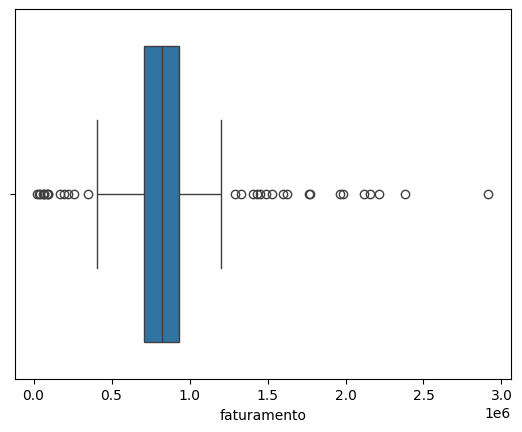

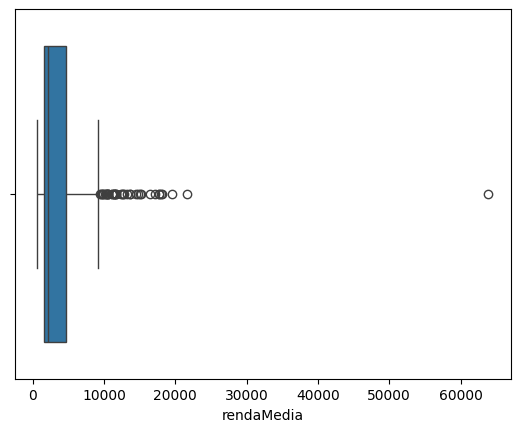

In [63]:
# 3° Passo seria verificar a existencia de outliers
sns.boxplot(x=df_filter['faturamento'])
plt.show()

sns.boxplot(x=df_filter['rendaMedia'])
plt.show()

In [64]:
# Analisando o grafico de boxplot, podemos ver que existem outliers no faturamento, 
# Mas não irei remove-los pois não sei se são perfis de bairros muito acima ou abaixo da média para RJ

# Vou segmentar os outliers para analisar e pesquisar melhor os perfis dos bairros
Q1 = df_filter['faturamento'].quantile(0.25)
Q3 = df_filter['faturamento'].quantile(0.75)
IQR = Q3 - Q1

# Define os limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_faturamento_filtrado_outliers = df_filter[
    (df_filter['faturamento'] >= lower_bound) & (df_filter['faturamento'] <= upper_bound)
]

df_faturamento_filtrado_outliers.describe()

,população,popDe20a24,popDe25a34,popDe35a49,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,rendaMedia,faturamento
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,1.220000e+02
mean,11685.532787,2038.057377,4078.549180,5568.926230,28.983607,177.295082,1017.991803,1658.844262,2352.147541,8.181885e+05
std,8531.285772,1542.590106,2951.982637,4090.544754,104.352152,255.841237,1066.243468,1425.350315,2002.629840,1.584433e+05
min,83.000000,17.000000,28.000000,38.000000,0.000000,0.000000,0.000000,0.000000,654.000000,4.044760e+05
25%,5131.500000,835.000000,1790.750000,2407.750000,0.000000,0.000000,310.500000,640.500000,1502.500000,7.289970e+05
50%,10897.500000,1814.000000,3739.000000,4983.500000,0.000000,88.000000,676.500000,1306.500000,1886.500000,8.096115e+05
75%,17030.750000,2889.750000,5977.250000,8104.000000,0.000000,238.750000,1297.250000,2354.500000,2409.750000,9.080972e+05
max,47405.000000,8520.000000,16085.000000,23292.000000,815.000000,1245.000000,6441.000000,8325.000000,17659.000000,1.204467e+06


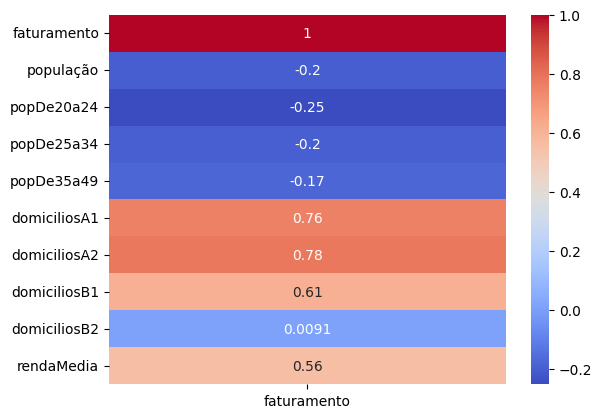

In [65]:
# Vamos analisar a correlação entre as variáveis numéricas e a coluna faturamento
correlation_matrix = df_filter[['faturamento', 'população', 'popDe20a24', 'popDe25a34', 'popDe35a49', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'rendaMedia']].corr()
sns.heatmap(correlation_matrix[['faturamento']], annot=True, cmap='coolwarm')
plt.show()

 Analisando o heatmap, podemos ver que a quantidade de domicilios A1 e A2 tem uma correlação **POSITIVA** com o faturamento.

Renda media e a quantidade de domicilios B1 apresentam uma correlação positiva com o faturamento, porém abixo das rendas A1 e A2.

Outro ponto interessante é a correlação negativa entre a população total e o faturamento, ademais os indicadores per capita não tem uma correlação muito forte com o faturamento.

Terminamos a analise exploratória, agora vamos propor alguns um modelo de previsão para o faturamento.


## 2. Treinamentos dos modelos


In [66]:
# Preparando os dados para os modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar os dados de treinamento (RJ) e teste (SP)
df_RJ = df_filter[df_filter['estado'] == 'RJ']
df_SP = df_filter[df_filter['estado'] == 'SP']

# Definir as variáveis independentes (X) e dependente (y) para o treinamento
X_rj = df_RJ[['população', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'rendaMedia']]
y_rj = df_RJ['faturamento']

X_train, X_test, y_train, y_test = train_test_split(X_rj, y_rj, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_sp = df_SP[['população', 'domiciliosA1', 'domiciliosA2', 'domiciliosB1', 'domiciliosB2', 'rendaMedia']]

### Regressão linear

MSE: 36753033021.95514
R2: 0.8195525770840184


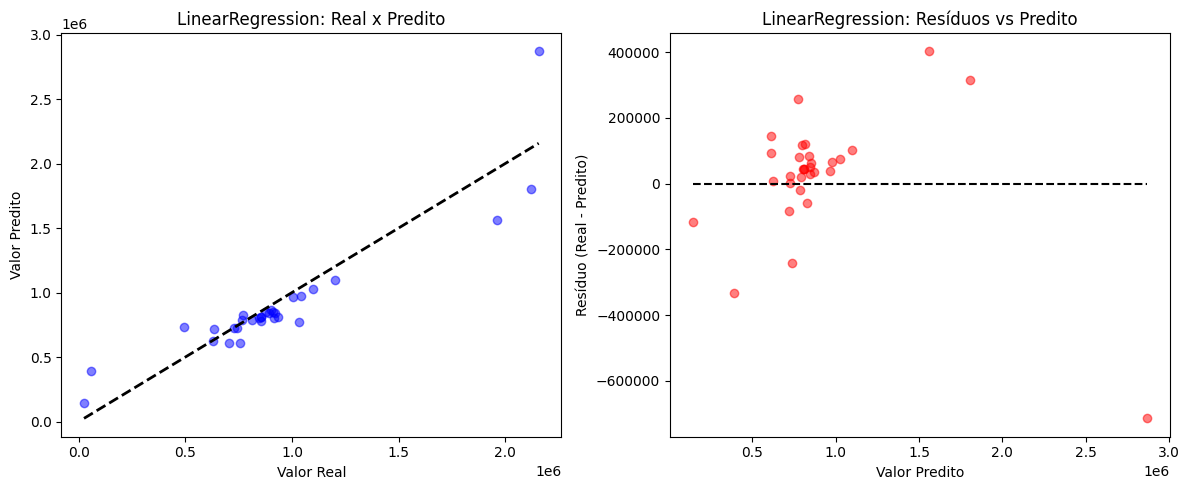

In [67]:
# Vamos criar um modelo de regressão linear para prever o faturamento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Avaliar o modelo
mse_rl = mean_squared_error(y_test, model.predict(X_test))
r2_rl = r2_score(y_test, model.predict(X_test))
print(f'MSE: {mse_rl}')
print(f'R2: {r2_rl}')

# Prever o faturamento para os bairros de SP
df_SP = df_SP.copy()
df_SP.loc[:,'faturamento_previsto_rl'] = model.predict(scaler.transform(X_sp))
df_SP[['nome', 'faturamento_previsto_rl']].head(10)

# Obter previsões e calcular resíduos para o Gradient Boosting
predicoes_gb = model.predict(X_test)
residuos_gb = y_test - predicoes_gb

# Criar a figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Gráfico: Valores reais vs. Valores previstos
axes[0].scatter(y_test, predicoes_gb, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_title('LinearRegression: Real x Predito')
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Valor Predito')

# Gráfico: Resíduos vs. Valores previstos
axes[1].scatter(predicoes_gb, residuos_gb, alpha=0.5, color='red')
axes[1].hlines(y=0, xmin=predicoes_gb.min(), xmax=predicoes_gb.max(), colors='black', linestyles='dashed')
axes[1].set_title('LinearRegression: Resíduos vs Predito')
axes[1].set_xlabel('Valor Predito')
axes[1].set_ylabel('Resíduo (Real - Predito)')

plt.tight_layout()
plt.show()

### Random Forest

MSE: 24947762828.579697
R2: 0.8775132515662827


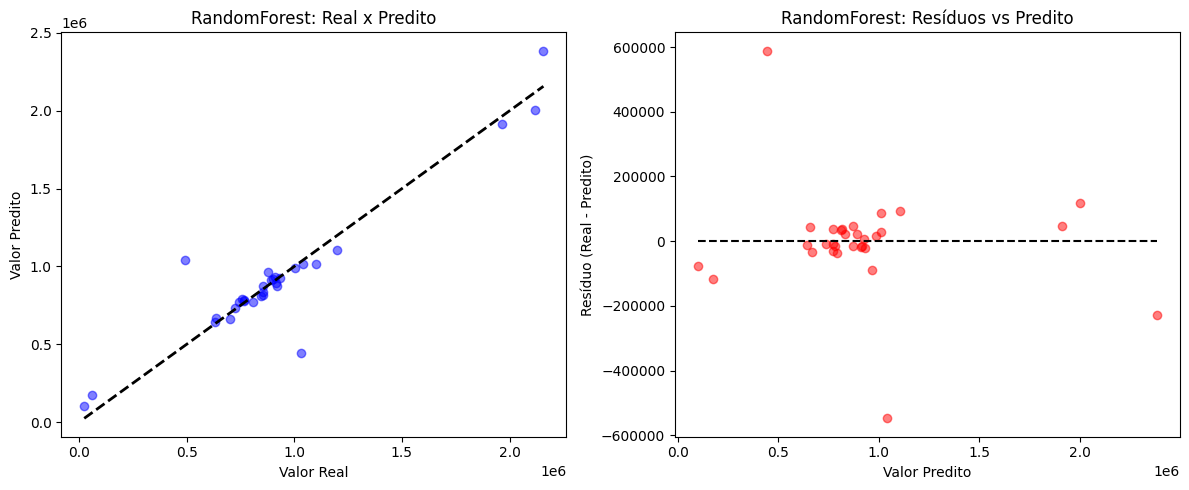

In [68]:
# Vamos criar um modelo usando o Random Forest para prever o faturamento
from sklearn.ensemble import RandomForestRegressor

# Treinar o modelo
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Avaliar o modelo
mse_rf = mean_squared_error(y_test, model_rf.predict(X_test))
r2_rf = r2_score(y_test, model_rf.predict(X_test))
print(f'MSE: {mse_rf}')
print(f'R2: {r2_rf}')

# Prever o faturamento para os bairros de SP
df_SP = df_SP.copy()
df_SP.loc[:,'faturamento_previsto_rf'] = model_rf.predict(scaler.transform(X_sp))
df_SP[['nome', 'faturamento_previsto_rf']].head(10)

# Obter previsões e calcular resíduos para o Gradient Boosting
predicoes_gb = model_rf.predict(X_test)
residuos_gb = y_test - predicoes_gb

# Criar a figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Gráfico: Valores reais vs. Valores previstos
axes[0].scatter(y_test, predicoes_gb, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_title('RandomForest: Real x Predito')
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Valor Predito')

# Gráfico: Resíduos vs. Valores previstos
axes[1].scatter(predicoes_gb, residuos_gb, alpha=0.5, color='red')
axes[1].hlines(y=0, xmin=predicoes_gb.min(), xmax=predicoes_gb.max(), colors='black', linestyles='dashed')
axes[1].set_title('RandomForest: Resíduos vs Predito')
axes[1].set_xlabel('Valor Predito')
axes[1].set_ylabel('Resíduo (Real - Predito)')

plt.tight_layout()
plt.show()

### Gradient Boosting

MSE: 31774113594.818634
R2: 0.8439977209445646


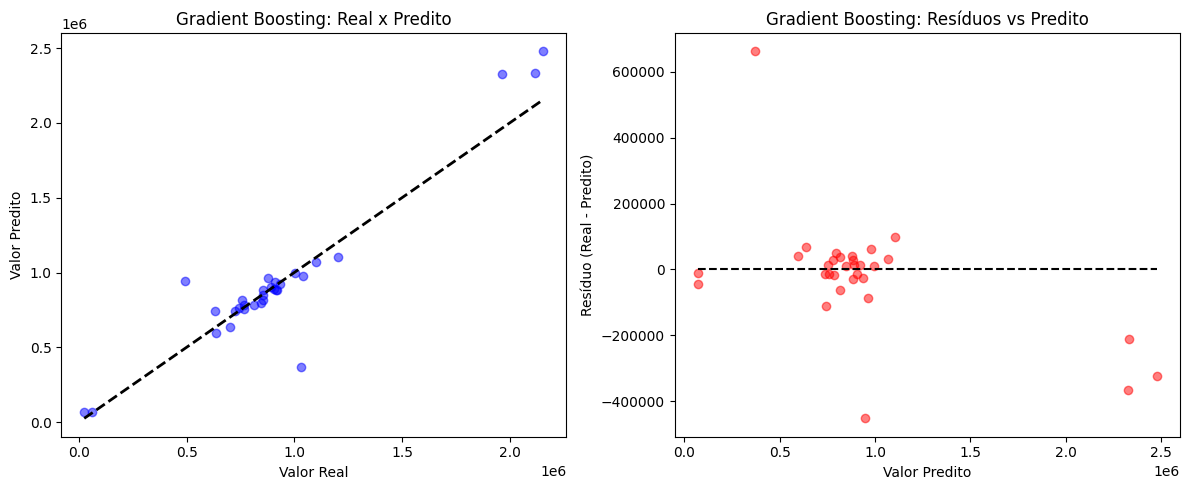

In [69]:
# Vamos criar um modelo usando o Gradient Boosting para prever o faturamento
from sklearn.ensemble import GradientBoostingRegressor

# Treinar o modelo
model_gb = GradientBoostingRegressor()
model_gb.fit(X_train, y_train)

# Avaliar o modelo
mse_gb = mean_squared_error(y_test, model_gb.predict(X_test))
r2_gb = r2_score(y_test, model_gb.predict(X_test))
print(f'MSE: {mse_gb}')
print(f'R2: {r2_gb}')

# Prever o faturamento para os bairros de SP
df_SP = df_SP.copy()
df_SP.loc[:, 'faturamento_previsto_gb'] = model_gb.predict(scaler.transform(X_sp))
df_SP[['nome', 'faturamento_previsto_gb']].head(10)

# Obter previsões e calcular resíduos para o Gradient Boosting
predicoes_gb = model_gb.predict(X_test)
residuos_gb = y_test - predicoes_gb

# Criar a figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico: Valores reais vs. Valores previstos
axes[0].scatter(y_test, predicoes_gb, alpha=0.5, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[0].set_title('Gradient Boosting: Real x Predito')
axes[0].set_xlabel('Valor Real')
axes[0].set_ylabel('Valor Predito')

# Gráfico: Resíduos vs. Valores previstos
axes[1].scatter(predicoes_gb, residuos_gb, alpha=0.5, color='red')
axes[1].hlines(y=0, xmin=predicoes_gb.min(), xmax=predicoes_gb.max(), colors='black', linestyles='dashed')
axes[1].set_title('Gradient Boosting: Resíduos vs Predito')
axes[1].set_xlabel('Valor Predito')
axes[1].set_ylabel('Resíduo (Real - Predito)')

plt.tight_layout()
plt.show()

### Comparação com os modelos preditos

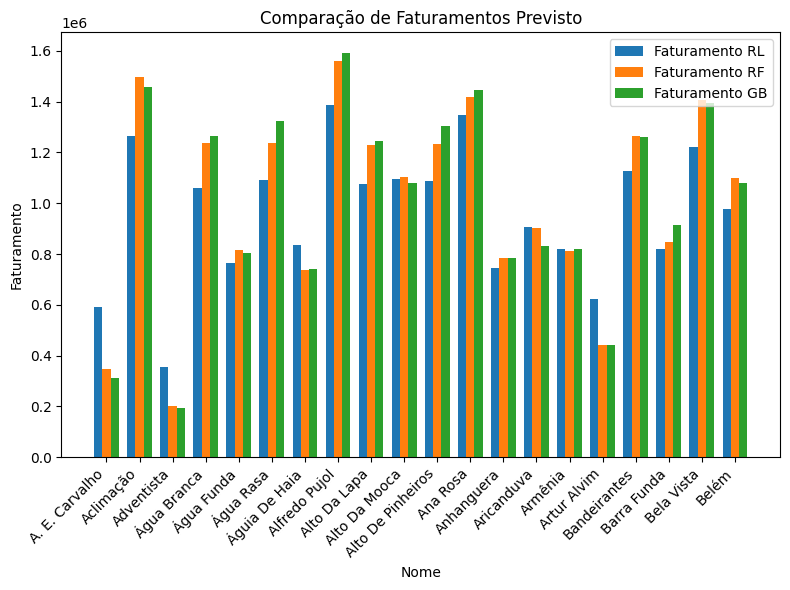

In [70]:
# Configurar posição das barras
df = df_SP[['nome', 'faturamento_previsto_rl', 'faturamento_previsto_rf', 'faturamento_previsto_gb']].head(20)
barWidth = 0.25
r1 = np.arange(len(df))
r2 = r1 + barWidth
r3 = r2 + barWidth

plt.figure(figsize=(8, 6))
plt.bar(r1, df['faturamento_previsto_rl'], width=barWidth, label='Faturamento RL')
plt.bar(r2, df['faturamento_previsto_rf'], width=barWidth, label='Faturamento RF')
plt.bar(r3, df['faturamento_previsto_gb'], width=barWidth, label='Faturamento GB')

plt.xlabel('Nome')
plt.ylabel('Faturamento')
plt.title('Comparação de Faturamentos Previsto')
plt.xticks(r1 + barWidth, df['nome'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

### 3. Avaliação dos modelos

### Conclusão sobre o Modelo

Após analisar os dados preditos para São Paulo e as validações dos modelos, escolhemos o modelo de Random Forest como o mais adequado. No entanto, o modelo Gradient Boosting também apresentou um desempenho muito próximo. Ambos os modelos mostraram-se eficazes na previsão do faturamento, considerando as variáveis disponíveis.

**Random Forest**:
- Apresentou o maior coeficiente de determinação (𝑅²) de 0.8775, indicando que o modelo consegue explicar cerca de 87.75% da variabilidade dos dados.
- Os gráficos mostraram que os valores preditos estão bem alinhados com os valores reais, e os resíduos apresentam uma distribuição razoavelmente homogênea.

**Gradient Boosting**:
- Teve um 𝑅² de 0.8439, um pouco abaixo do Random Forest, mas ainda mostrando um excelente desempenho.
- Os gráficos também indicaram uma boa aderência entre os valores reais e preditos, com resíduos distribuídos de maneira semelhante ao Random Forest.

**Regressão Linear**:
- Obteve o menor 𝑅² de 0.8195, mostrando que este modelo não captura tão bem a variabilidade dos dados.
- Os gráficos revelaram uma maior dispersão entre os valores reais e preditos, bem como uma distribuição menos homogênea dos resíduos.

### Considerações Finais

Em resumo, enquanto o modelo de Random Forest foi escolhido como o mais adequado, a inclusão de variáveis adicionais e mais detalhadas pode potencialmente melhorar ainda mais a precisão das previsões.